In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
# import keras models
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

In [9]:
# set random seed globally
my_seed = 21
from numpy.random import seed
seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed) 
# tensorflow version
print(tf.__version__)

2.6.0


In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',
                 names = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [11]:
def buildDataSet (dataframe, test_data_fraction):
    # encoding the target column
    le = LabelEncoder()
    label = le.fit_transform(df['class'])
    label

    encoded_df = df.copy()
    encoded_df.drop("class", axis=1, inplace=True)
    encoded_df["class"] = label

    # Set the total number of classes
    nb_classes = len(encoded_df['class'].unique())

    # Creating target and features
    X = encoded_df.drop(['class'], axis=1)
    y = encoded_df['class']

    # scale the variables
    sc = StandardScaler() 
    X_scaled = sc.fit_transform(X)

    # Split into train and test set and normalize data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = test_data_fraction,stratify=y) #, random_state = 0)


    return encoded_df, nb_classes, X_train, X_test, y_train, y_test

In [12]:
# build dataset on our dataframe
encoded_dataframe, nb_classes, X_train, X_test, y_train, y_test = buildDataSet (df, 0.2)

print(encoded_dataframe.head())

print("")

print(f"classes_in_dataset = {nb_classes}")

print("")

print(f"X_train.shape = {X_train.shape}")
print(f"X_test.shape = {y_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      0  
1   6.3609  205.2610      0  
2  76.9600  256.7880      0  
3  10.4490  116.7370      0  
4   4.6480  356.4620      0  

classes_in_dataset = 2

X_train.shape = (15216, 10)
X_test.shape = (15216,)
y_train.shape = (15216,)
y_test.shape = (3804,)


In [13]:
def buildSequentialModel(hidden_layers_activation, output_layer_activation):
    # Build a Sequential Model.
    model = Sequential()
    # model.add(Flatten(input_shape=(28, 28)))
    
    
    model.add(Dense(100, kernel_initializer='normal', activation=hidden_layers_activation))
    model.add(Dropout(0.3))
    model.add(Dense(80, kernel_initializer='normal', activation=hidden_layers_activation))
    model.add(Dropout(0.3))
    model.add(Dense(60, kernel_initializer='normal', activation=hidden_layers_activation))
    model.add(Dropout(0.3))
    
    # Output Layer
    model.add(Dense(nb_classes, activation=output_layer_activation))
   
    return model

In [14]:
# instantiate model
model = buildSequentialModel('tanh', 'softmax') # change activation functions
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

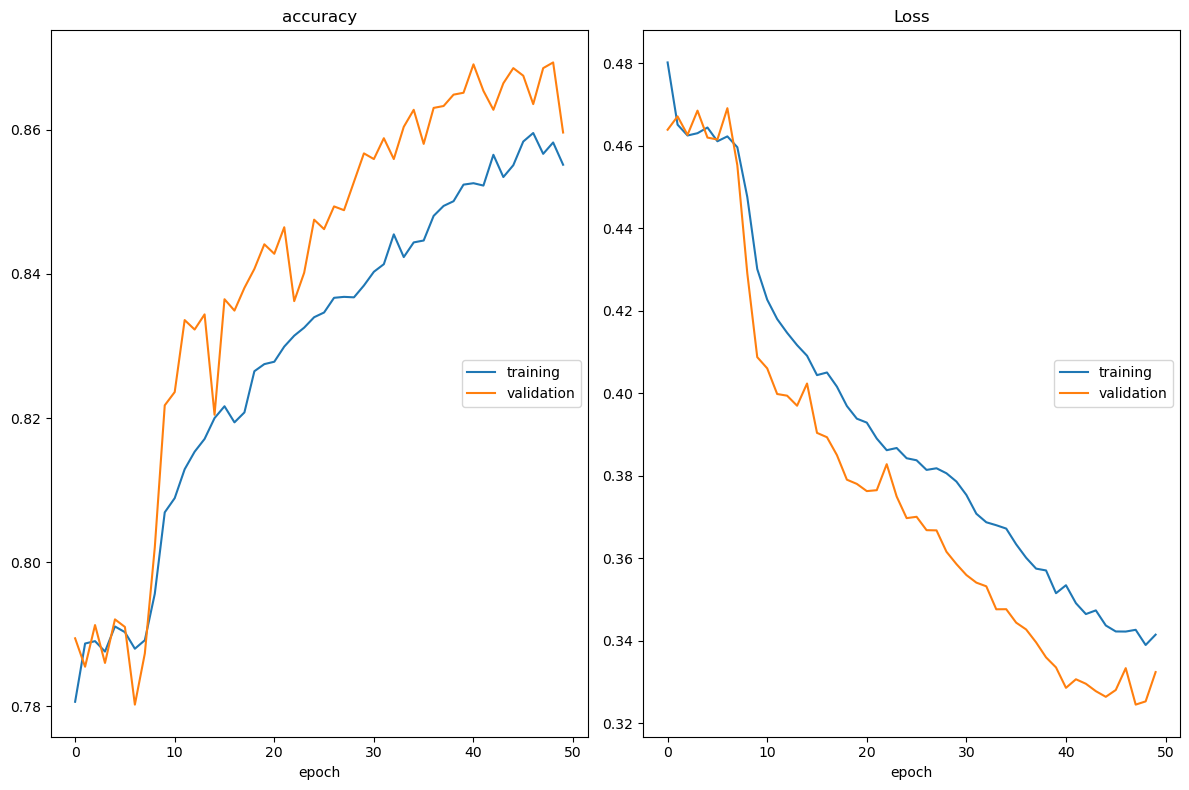

accuracy
	training         	 (min:    0.781, max:    0.860, cur:    0.855)
	validation       	 (min:    0.780, max:    0.869, cur:    0.860)
Loss
	training         	 (min:    0.339, max:    0.480, cur:    0.341)
	validation       	 (min:    0.325, max:    0.469, cur:    0.332)


In [15]:
model.fit(X_train, y_train,callbacks=[PlotLossesKeras()],
          batch_size=100, epochs=50, verbose=1,
          validation_data=(X_test, y_test))